# Make Vt dataset from, Ids-Vgs Curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
W=10
L=5
T=25
full_df = pd.read_csv('../data/W10L5T25.csv')
full_df.head()

,Vds,Vgs,Ids,W,L,T
0,0.1,-20.0,7.510100e-14,10,5,25
1,0.1,-19.8,7.510100e-14,10,5,25
2,0.1,-19.6,7.510100e-14,10,5,25
3,0.1,-19.4,7.510100e-14,10,5,25
4,0.1,-19.2,7.510100e-14,10,5,25


In [3]:
vgs_list = full_df['Vgs'].unique()
len(vgs_list)

201

In [4]:
vds_list = full_df['Vds'].unique()
len(vds_list)

6

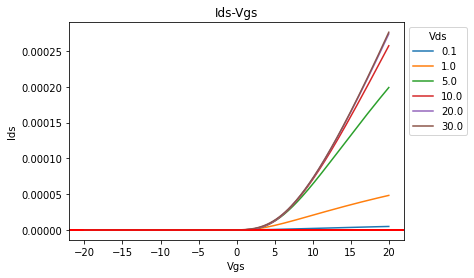

In [5]:
for vds in vds_list:
    plt.plot(full_df.query('Vds=='+str(vds))['Vgs'], full_df.query('Vds=='+str(vds))['Ids'], label=vds)
    plt.xlabel('Vgs')
    plt.ylabel('Ids')
    plt.axhline(y = 1e-8*W/L, color = 'r', linestyle = '-')
    plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Vds')
    plt.title('Ids-Vgs')

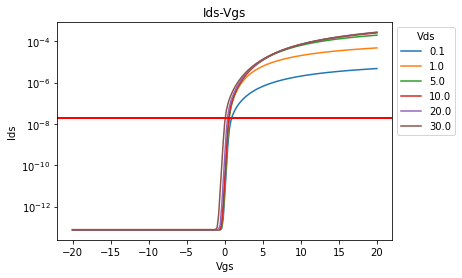

In [6]:
for vds in vds_list:
    plt.plot(full_df.query('Vds=='+str(vds))['Vgs'], full_df.query('Vds=='+str(vds))['Ids'], label=vds)
    plt.xlabel('Vgs')
    plt.ylabel('Ids')
    plt.yscale('log')
    plt.axhline(y = 1e-8*W/L, color = 'r', linestyle = '-')
    plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Vds')
    plt.title('Ids-Vgs')

## Find Vth (threshold) point

In [7]:
v_threshold_point_list = []
std_value = [math.log(1e-8*W/L)]
for vds in vds_list:
    min_dist = 99
    v_threshold = -100
    ids_threshold = -100
    for vgs in vgs_list:
        point_ids = full_df.query('(Vds=='+str(vds)+') and (Vgs=='+str(vgs)+')')['Ids'].values[0]
        current_dist = math.dist(std_value, [math.log(point_ids)])
        if current_dist < min_dist:
            min_dist = current_dist
            v_threshold = vgs
            ids_threshold = point_ids
    v_threshold_point_list.append([vds, v_threshold, ids_threshold, W, L, T])
v_threshold_point_list

[[0.1, 1.0, 2.4687e-08, 10, 5, 25],
 [1.0, 0.6, 2.1353e-08, 10, 5, 25],
 [5.0, 0.6, 2.4018e-08, 10, 5, 25],
 [10.0, 0.6, 3.0986e-08, 10, 5, 25],
 [20.0, 0.4, 2.5735e-08, 10, 5, 25],
 [30.0, -3.7581e-14, 1.2602e-08, 10, 5, 25]]

In [8]:
def get_vt_point_list(width, length, temperature):
    v_threshold_point_list = []
    std_value = [math.log(1e-8*width/length)]
    df = pd.read_csv('../data/'+ 'W' + str(width) + 'L' + str(length) + 'T' + str(temperature) + '.csv')
    vds_list = df['Vds'].unique()
    vgs_list = df['Vgs'].unique()
    for vds in vds_list:
        min_dist = 99
        v_threshold = -100
        ids_threshold = -100
        for vgs in vgs_list:
            point_ids = df.query('(Vds=='+str(vds)+') and (Vgs=='+str(vgs)+')')['Ids'].values[0]
            current_dist = math.dist(std_value, [math.log(point_ids)])
            if current_dist < min_dist:
                min_dist = current_dist
                v_threshold = vgs
                ids_threshold = point_ids
        v_threshold_point_list.append([vds, v_threshold, ids_threshold, width, length, temperature])
    return v_threshold_point_list

In [9]:
WIDTHS = [10, 20, 35, 50, 100, 1000]
LENGTHS = [5, 8, 10, 12]
TEMPS = [0, 25, 80]

In [10]:
total_v_threshold_point_list = []
for width in WIDTHS:
    for length in LENGTHS:
        for temperature in TEMPS:
            total_v_threshold_point_list += get_vt_point_list(width, length, temperature)
len(total_v_threshold_point_list)

432

In [11]:
vt_dataframe = pd.DataFrame(total_v_threshold_point_list, columns=['Vds', 'Vgs', 'Ids', 'W', 'L', 'T'])
vt_dataframe.head()

,Vds,Vgs,Ids,W,L,T
0,0.1,1.0,2.555900e-08,10,5,0
1,1.0,0.6,2.024900e-08,10,5,0
2,5.0,0.6,2.271600e-08,10,5,0
3,10.0,0.6,2.948200e-08,10,5,0
4,20.0,0.4,2.438200e-08,10,5,0


In [12]:
vt_dataframe.to_csv('../data_vt/vt_dataset_rev.csv', index=False)